In [17]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate
import matplotlib.image as mpimg
import cv2
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%load_ext autoreload

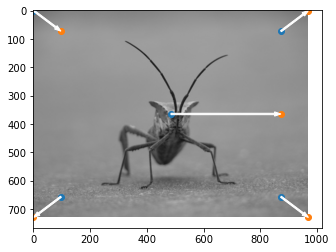

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# load image
img = cv2.imread('stinkbug.png')[:,:,:3].astype(np.float32)/255
height, width, channels = img.shape

# create points
points = np.array([
    (0.0,0.0), (0.1, 0.1),
    (0.9, 0.9), (1.0, 1.0),
    (0.9, 0.1), (1.0,0.0),
    (0.1, 0.9), (0.0,1.0),
    (0.5, 0.5),(0.9,0.5)
])*(width, height)
sourcePoints = points[0::2]
targetPoints = points[1::2]

# plot
plt.scatter(sourcePoints[:,0], sourcePoints[:, 1])
plt.scatter(targetPoints[:,0], targetPoints[:, 1])
for src, dst in zip(sourcePoints, targetPoints):
    plt.arrow(src[0], src[1], dst[0]-src[0], dst[1]-src[1], width=5, length_includes_head=True, color="white")

plt.imshow(img)

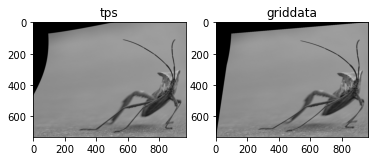

In [18]:
from thinplatespline import ThinPlateSpline
from griddatawarp import GriddataWarp
tps = ThinPlateSpline()
tps_img = tps(img, sourcePoints, targetPoints)
gdw_img = GriddataWarp()(img, sourcePoints, targetPoints)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title("tps")
ax1.imshow(tps_img)
ax2.set_title("griddata")
ax2.imshow(gdw_img)




In [22]:
from scipy.interpolate
class RBFWarp:
    def __call__(self, src, sourcePoints, targetPoints):
        r = src[:,:,0]
        return src

rbf_img = RBFWarp()(img, sourcePoints, targetPoints)
plt.imshow(img)

SyntaxError: invalid syntax (<ipython-input-22-0b20d977703d>, line 1)

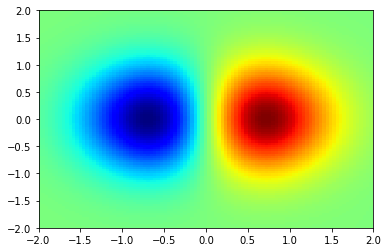

In [48]:
# 2-d tests - setup scattered data
x = np.random.rand(100)*4.0-2.0
y = np.random.rand(100)*4.0-2.0
z = x*np.exp(-x**2-y**2)
ti = np.linspace(-2.0, 2.0, 100)
XI, YI = np.meshgrid(ti, ti)

# use rbf
rbf = scipy.interpolate.Rbf(x,y,z, epsilon=2)
ZI = rbf(XI, YI)

#plot
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib import cm
# n = plt.normalize(-2., 2.)
# plt.subplot(1, 1, 1)
plt.pcolor(XI, YI, ZI, cmap=cm.jet)
# plt.scatter(x, y, 100, z, cmap=cm.jet)
# plt.title('RBF interpolation - multiquadrics')
# plt.xlim(-2, 2)
# plt.ylim(-2, 2)
# plt.colorbar()



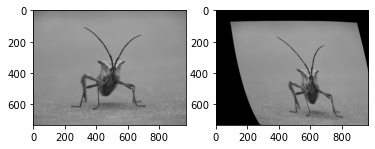

In [19]:
%autoreload
import matplotlib.pyplot as plt
from rbfwarp import RbfWarp

fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2)
ax1.imshow(img)
rbf_img = RbfWarp()(img, sourcePoints, targetPoints)
ax2.imshow(rbf_img)